In [22]:
'''
2.2 create_ts_models.ipynb

Generate the optimized time-series models. Code adapted from pycaret tutotial.

Koon Leong Ho
'''

In [ ]:

from library.common import Database, Core, clean_column_names
from pathlib import Path
import pandas as pd

max_p = 20
max_d = 20
max_q = 20
max_P = 10
max_D = 10
max_Q = 10

# set up run options
# set to True if a train-test validation is required.
score = False

# set up plot to True if a cross validation plot is required
plot = True

# set to True if the models are to be saved 
# this options allow the models to be genearted without updating existing models
save_models = True

# if forecast validation is required, set the hold-out sameple size
if score:
    out_of_sample_size=10
else:
    out_of_sample_size=0

# Set up the filesystem
cwd = Path.cwd()
model_dir = cwd.parent/r'models'
param_dir = cwd.parent/r'data/processed'

# Set up for common features to use
core = Core()

# Set up for database access
db = Database()

db_table = 'master_dataset'
df = pd.read_sql(db_table, db.engine)
df = df.dropna(subset = ['iso_code']).copy()
df = df[~df['iso_code'].isin(core.excluded_features)].copy()
df = df.fillna(0)

In [23]:
def plot_ts(df, order, feature):
    print(__doc__)

    # Author: Taylor Smith <taylor.smith@alkaline-ml.com>
    #
    # Plot time-series cross validation for visualization

    import numpy as np
    import pmdarima as pm
    from pmdarima import model_selection
    from matplotlib import pyplot as plt

    print("pmdarima version: %s" % pm.__version__)

    # Load the data and split it into separate pieces
    y = df[feature]
    est = pm.ARIMA(order=order,
                   # seasonal_order=(0, 1, 1, 12),
                   suppress_warnings=True)
    cv = model_selection.SlidingWindowForecastCV(
        # window_size=10,
        # step=8,
        # h=4
    )
    predictions = model_selection.cross_val_predict(
        est, y, cv=cv, verbose=0, averaging="median")

    # plot the predictions over the original series
    x_axis = np.arange(y.shape[0])
    n_test = predictions.shape[0]
    plt.figure(figsize=(20, 10))
    plt.plot(x_axis, y, alpha=0.75, c='b')
    plt.plot(x_axis[-n_test:], predictions, alpha=0.5, c='r')  # Forecasts
    plt.title(f"Cross-validated {feature}")

    plt.show()

In [24]:
import pmdarima as pm
import pickle

# get the selected features for the time series.
# since time series forecasts are meant to be used as inputs to the regression models,
# the features should be the same features used for regressions.
selected_features = core.regression_features
selected_features.append('co2')

print(selected_features)

# Select the data needed for the time series analysis
# Get the start and stop period of timeseries
from pathlib import Path
cwd = Path.cwd()
ts_timeframe = cwd.parent/'data'
ts_timeframe = ts_timeframe/'processed'
ts_timeframe = ts_timeframe/'timeseries_start_stop.pkl'
ts_period = pd.read_pickle(ts_timeframe)

selected = selected_features
ts_period = ts_period.loc[ts_period.feature.isin(selected)]
last_year = ts_period.stop.min().item()
forecast_param = {'last_period': last_year}

# store the forecast param into the json file
# Setup path to store forecast parameters json files
import json
full_path = param_dir/'params_forecast_params.json'
full_path = full_path.as_posix()
with open(full_path, "w") as outfile:
    json.dump(forecast_param, outfile)

['year', 'iso_code', 'population', 'constant_gdp_per_capita', 'energy_intensity', 'manufacturing_percent', 'trade_openness', 'renewable_energy_consumption_share', 'co2']


In [25]:
def get_optimal_param(timeseries):
    # returnt he optimized time series model
    return pm.auto_arima(timeseries,
                        start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=max_p, max_d = max_d, max_q=max_q,
                         max_P= max_P, max_D= max_D, max_Q= max_Q,
                         # max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, seasonal = True,
                         # D=10, max_D=10,
                         error_action='ignore')


In [26]:
regions = core.regions
world = core.world

def aggregrate_region(df, countries):
    # aggregrate all the data within a cluster for time series analysis.
    r_df = df.copy()
    if countries != 'Global':
        # Take the countries specified in the dictionary
        r_df = df[df['iso_code'].isin(regions.get(countries))].copy()

    r_df = r_df.groupby('year').sum().reset_index(drop = False)
    return r_df.copy()


FEATURE  population REGION  Cluster 0
START  1750 ALT START 1950
model-Cluster 0-population.pkl COMPLETED
PLOTTING population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


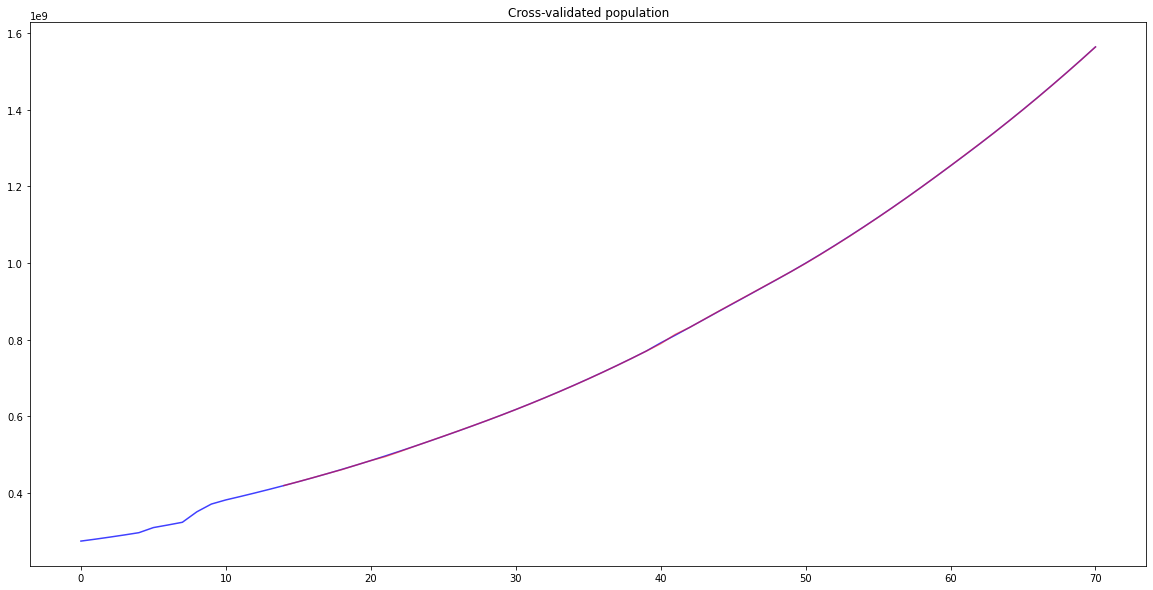

FEATURE  constant_gdp_per_capita REGION  Cluster 0
START  1960 ALT START 1970
model-Cluster 0-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


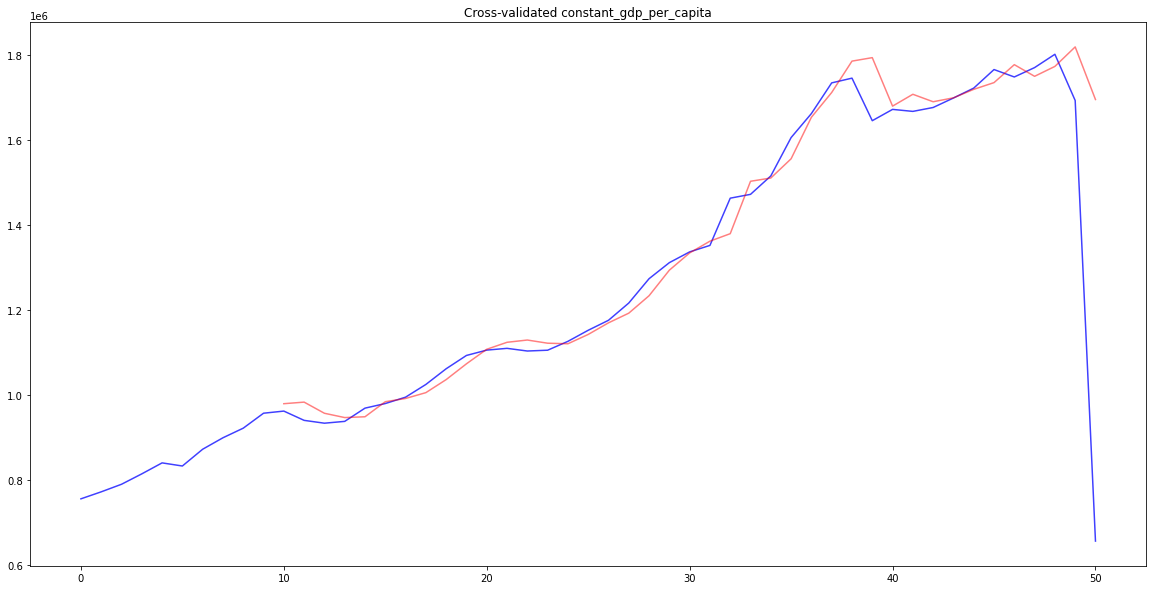

FEATURE  energy_intensity REGION  Cluster 0
START  1960 ALT START 1990
model-Cluster 0-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


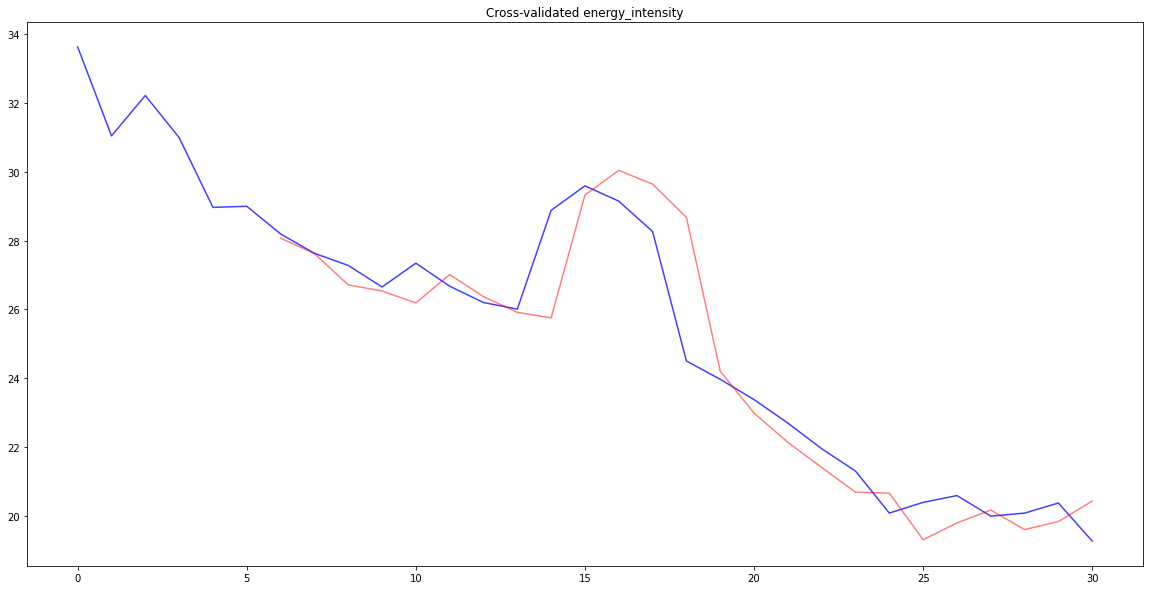

FEATURE  manufacturing_percent REGION  Cluster 0
START  1960 ALT START 1960
model-Cluster 0-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


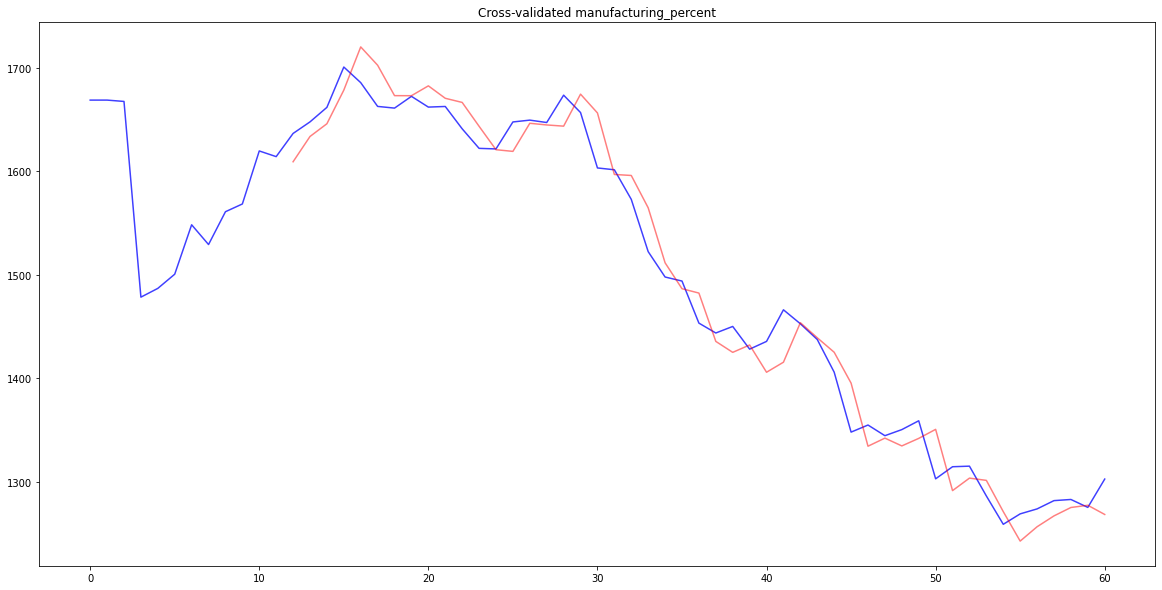

FEATURE  trade_openness REGION  Cluster 0
START  1960 ALT START 1960
model-Cluster 0-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


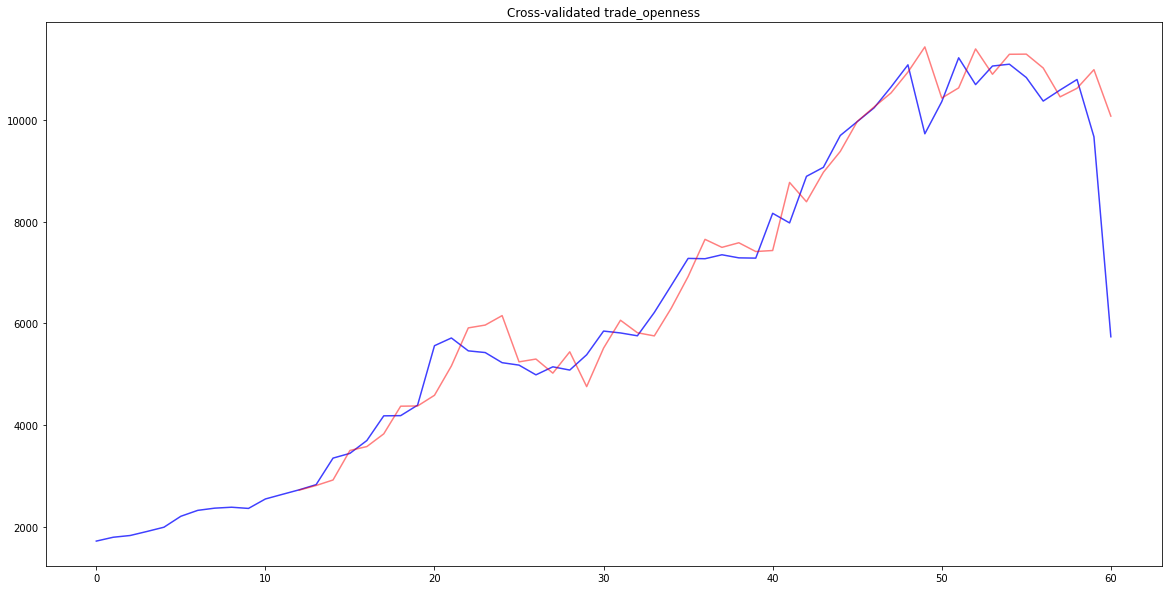

FEATURE  renewable_energy_consumption_share REGION  Cluster 0
START  1971 ALT START 1990
model-Cluster 0-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


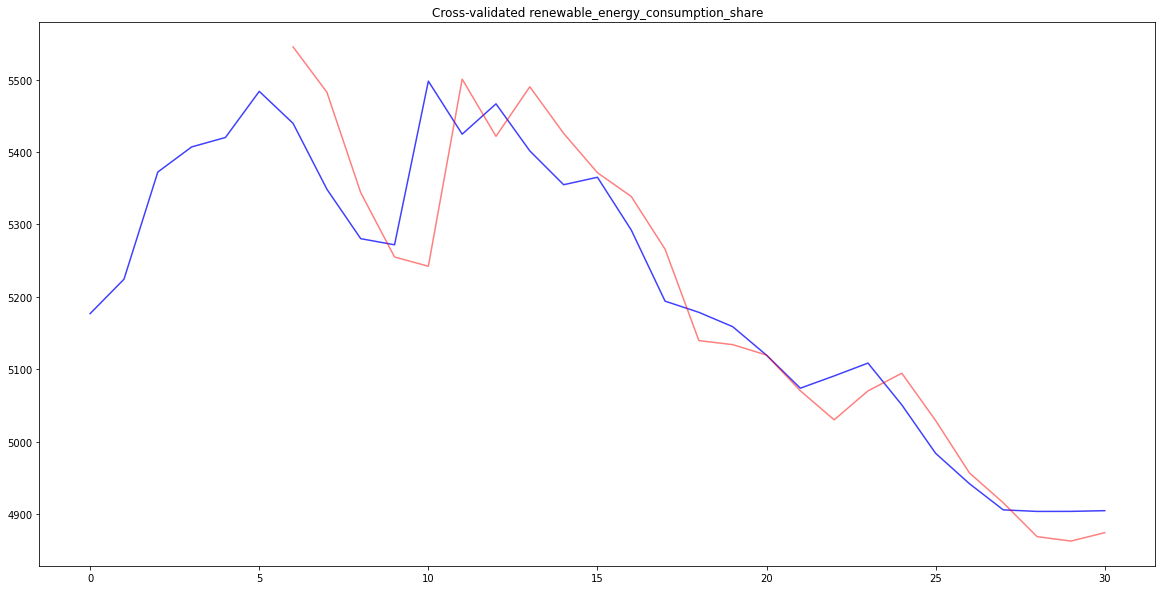

FEATURE  co2 REGION  Cluster 0
START  1750 ALT START 1750
model-Cluster 0-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


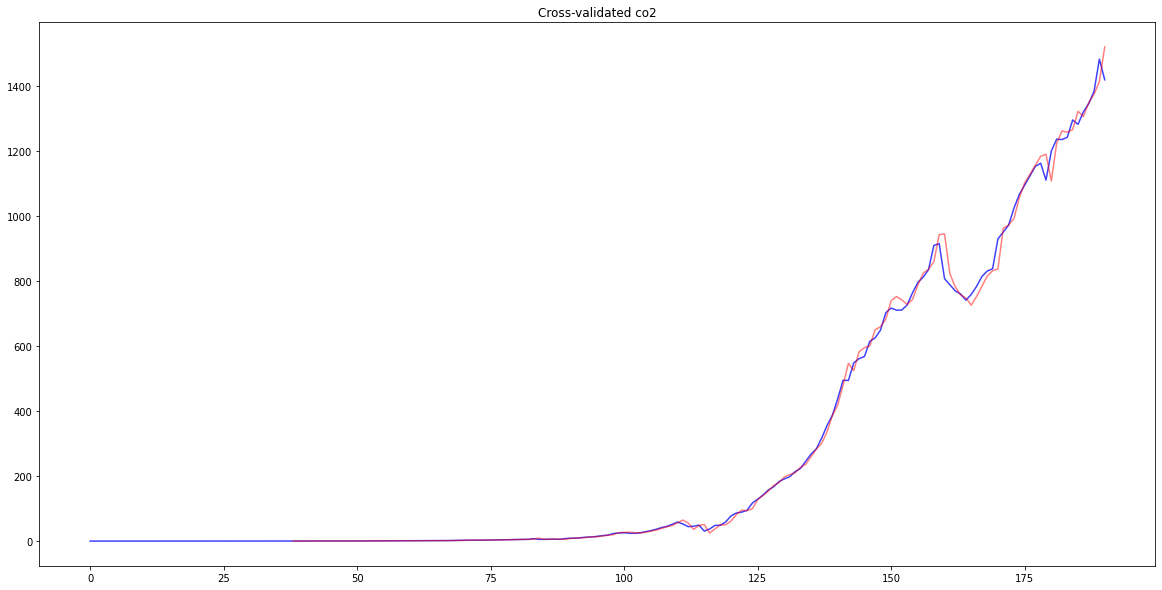

FEATURE  population REGION  Cluster 1
START  1750 ALT START 1950
model-Cluster 1-population.pkl COMPLETED
PLOTTING population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


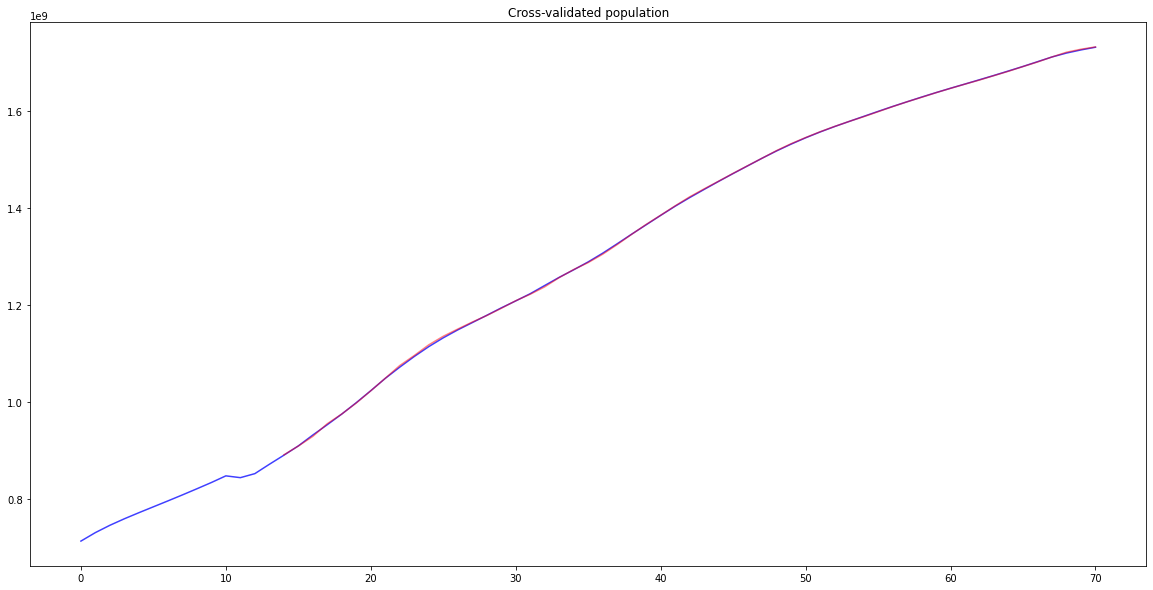

FEATURE  constant_gdp_per_capita REGION  Cluster 1
START  1960 ALT START 1970
model-Cluster 1-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


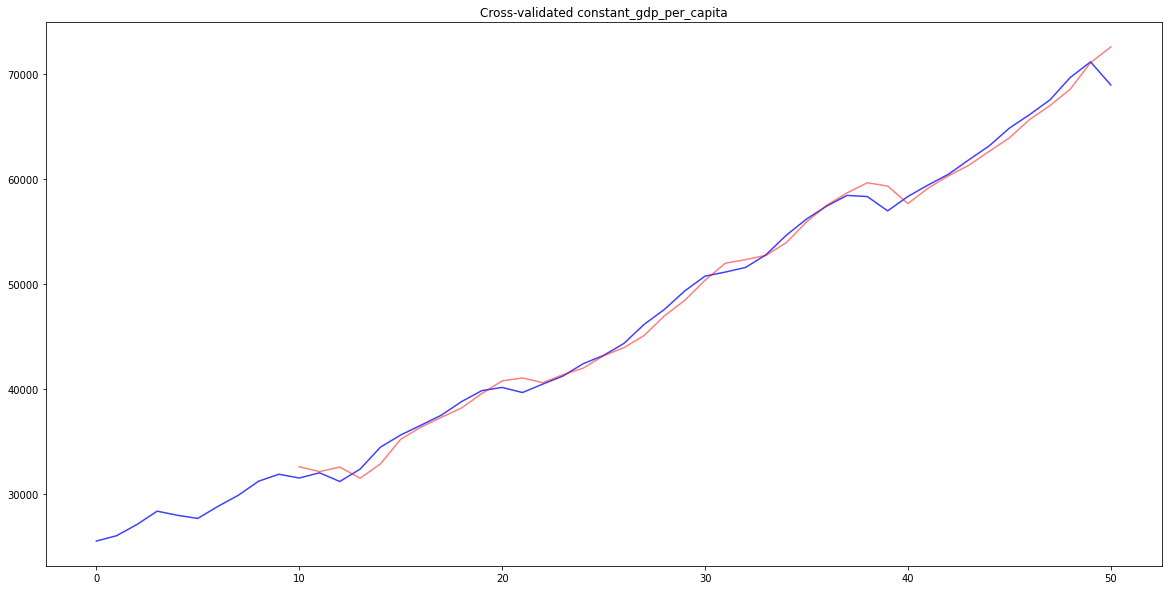

FEATURE  energy_intensity REGION  Cluster 1
START  1960 ALT START 1990
model-Cluster 1-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


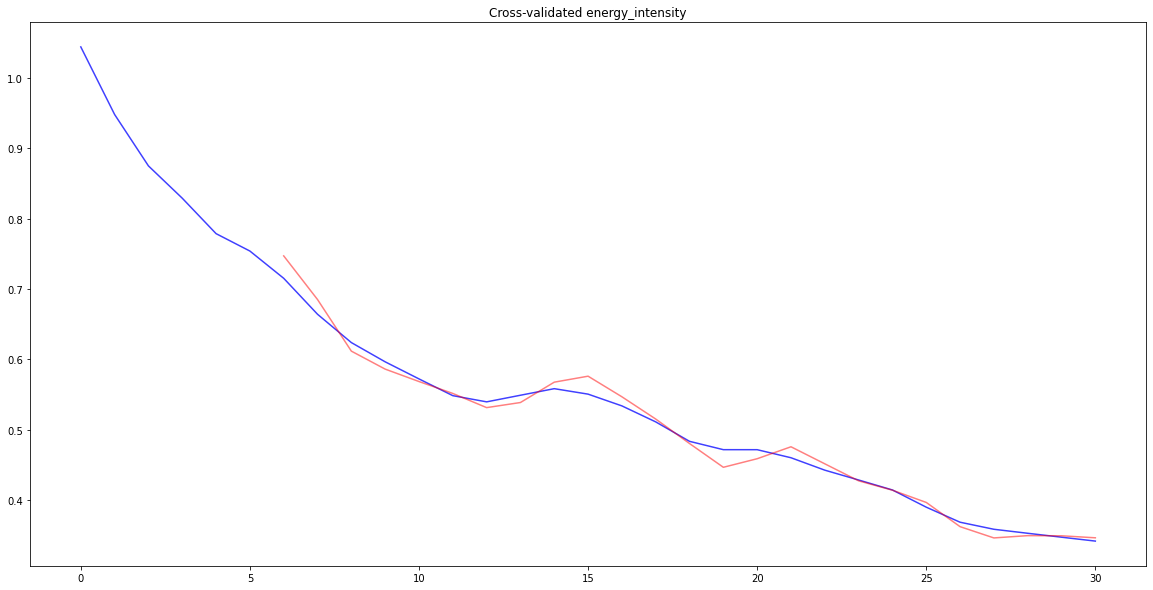

FEATURE  manufacturing_percent REGION  Cluster 1
START  1960 ALT START 1960
model-Cluster 1-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


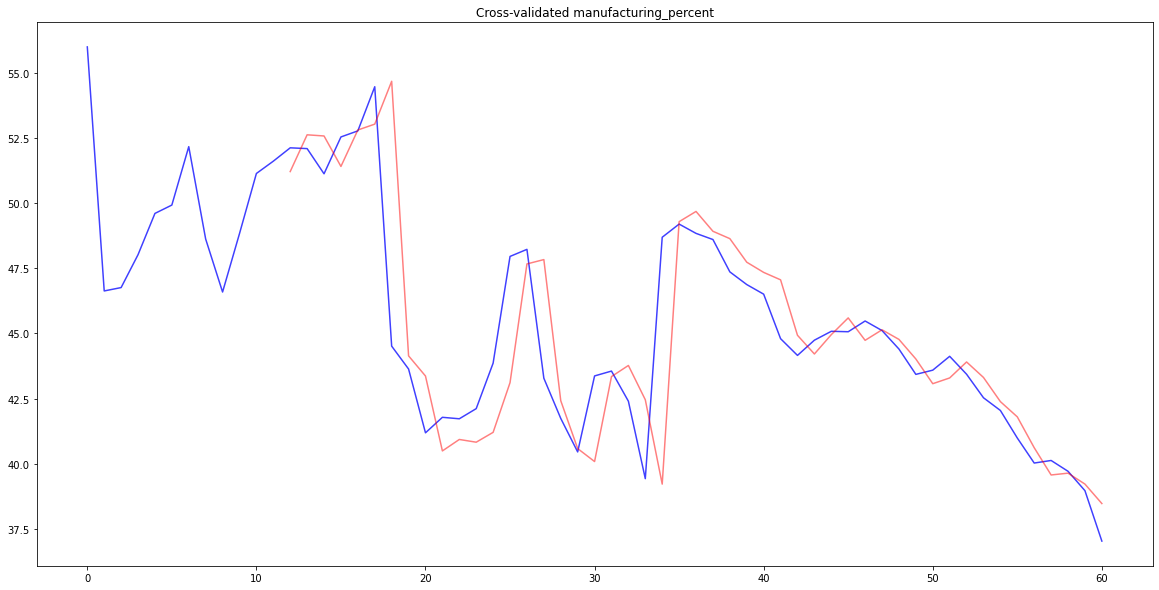

FEATURE  trade_openness REGION  Cluster 1
START  1960 ALT START 1960
model-Cluster 1-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


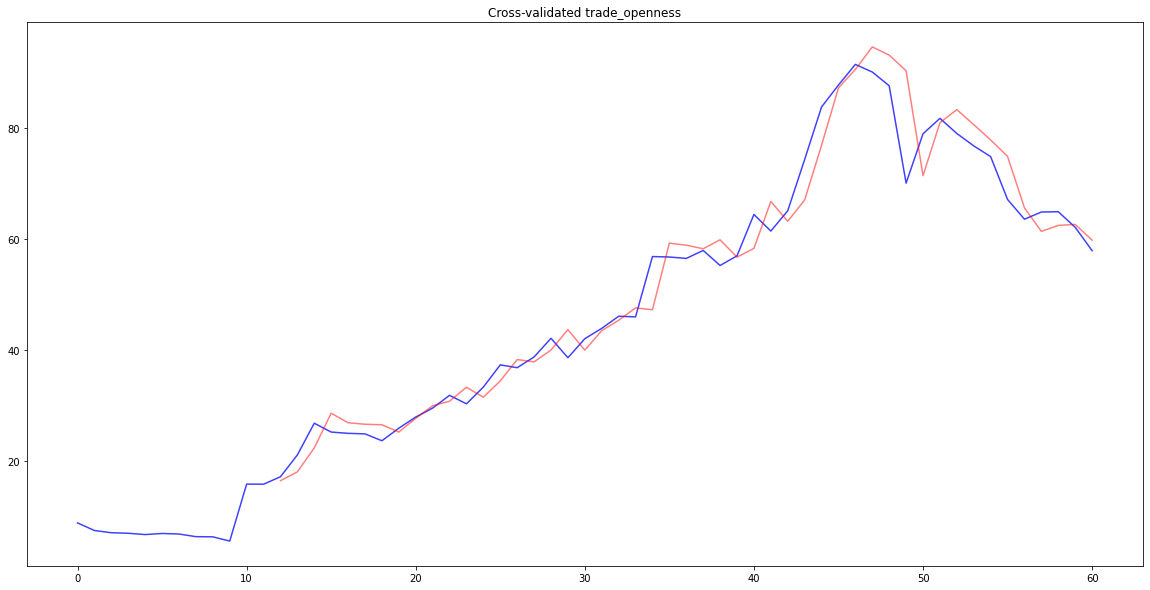

FEATURE  renewable_energy_consumption_share REGION  Cluster 1
START  1971 ALT START 1990
model-Cluster 1-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


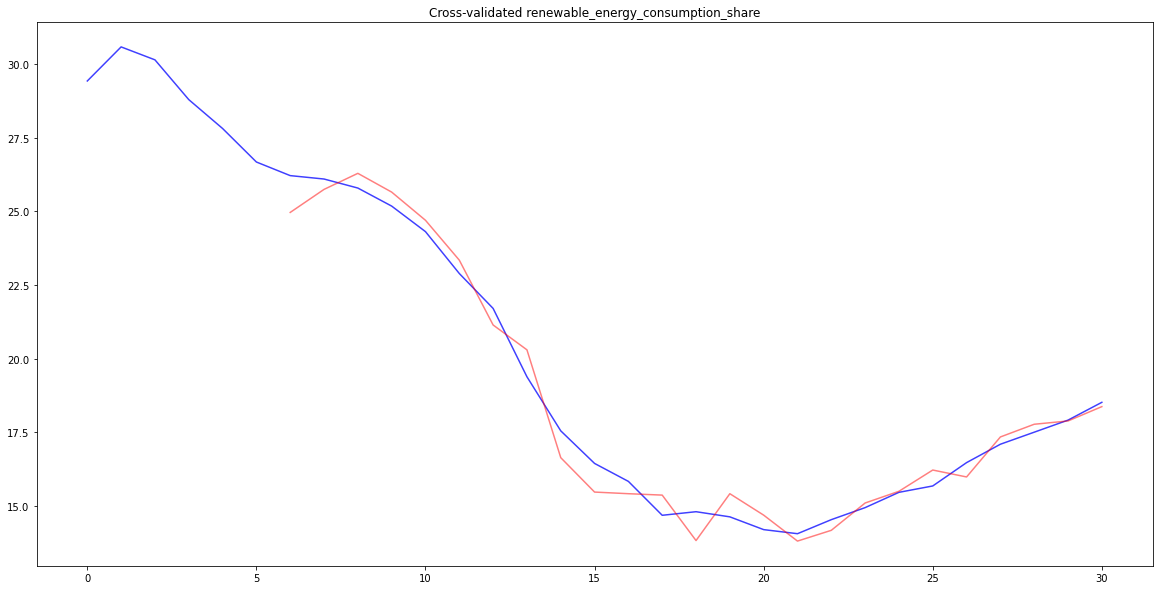

FEATURE  co2 REGION  Cluster 1
START  1750 ALT START 1750
model-Cluster 1-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


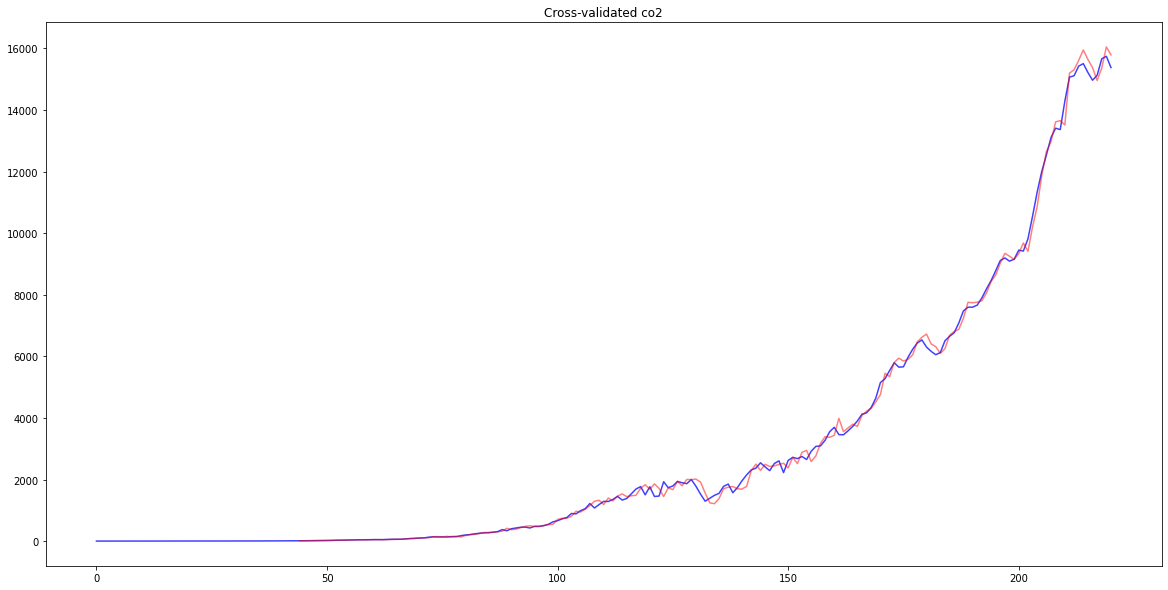

FEATURE  population REGION  Cluster 2
START  1750 ALT START 1950
model-Cluster 2-population.pkl COMPLETED
PLOTTING population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


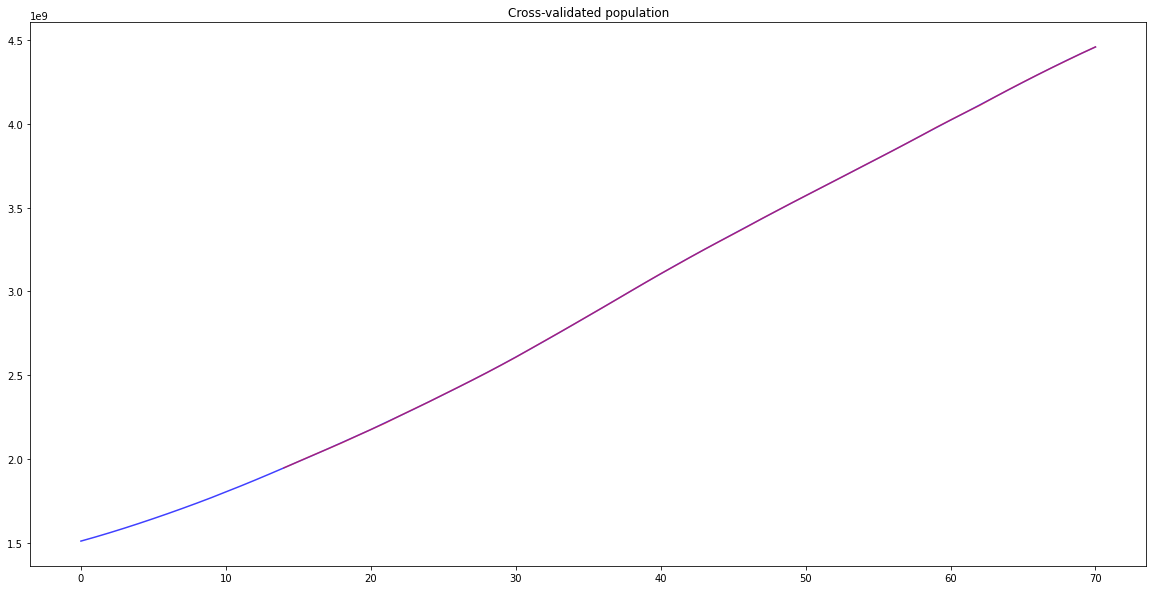

FEATURE  constant_gdp_per_capita REGION  Cluster 2
START  1960 ALT START 1970
model-Cluster 2-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


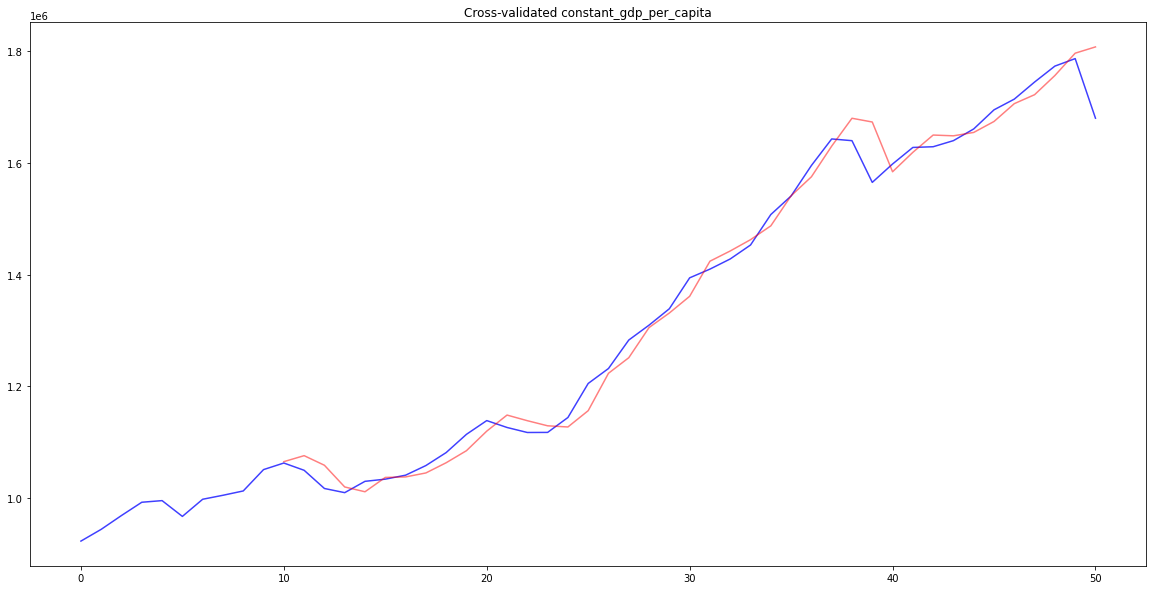

FEATURE  energy_intensity REGION  Cluster 2
START  1960 ALT START 1990
model-Cluster 2-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


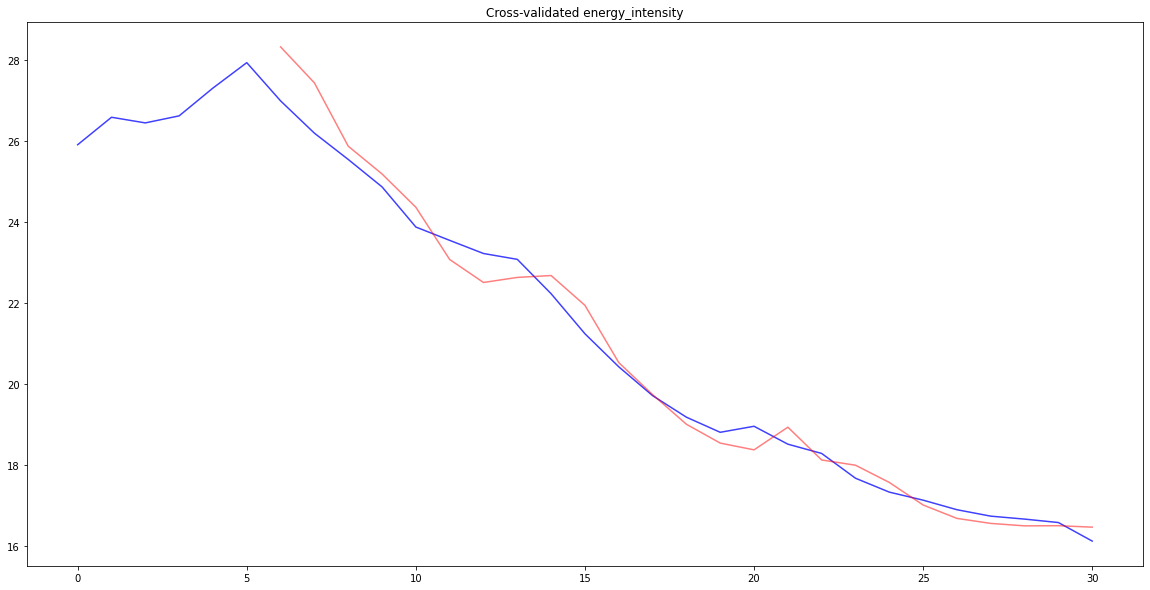

FEATURE  manufacturing_percent REGION  Cluster 2
START  1960 ALT START 1960
model-Cluster 2-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


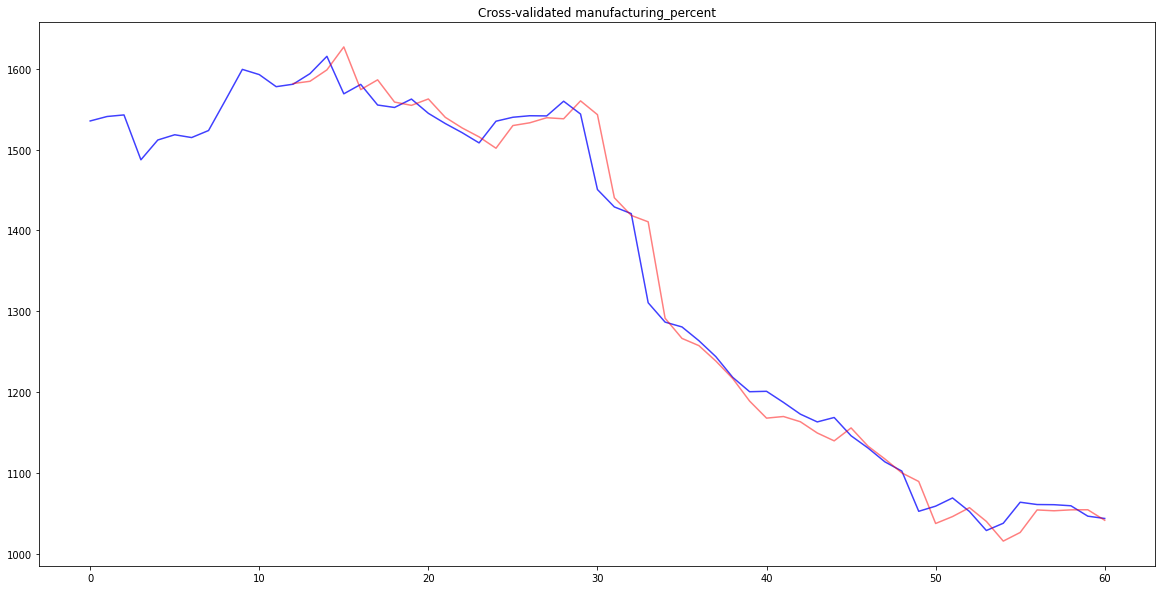

FEATURE  trade_openness REGION  Cluster 2
START  1960 ALT START 1960
model-Cluster 2-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


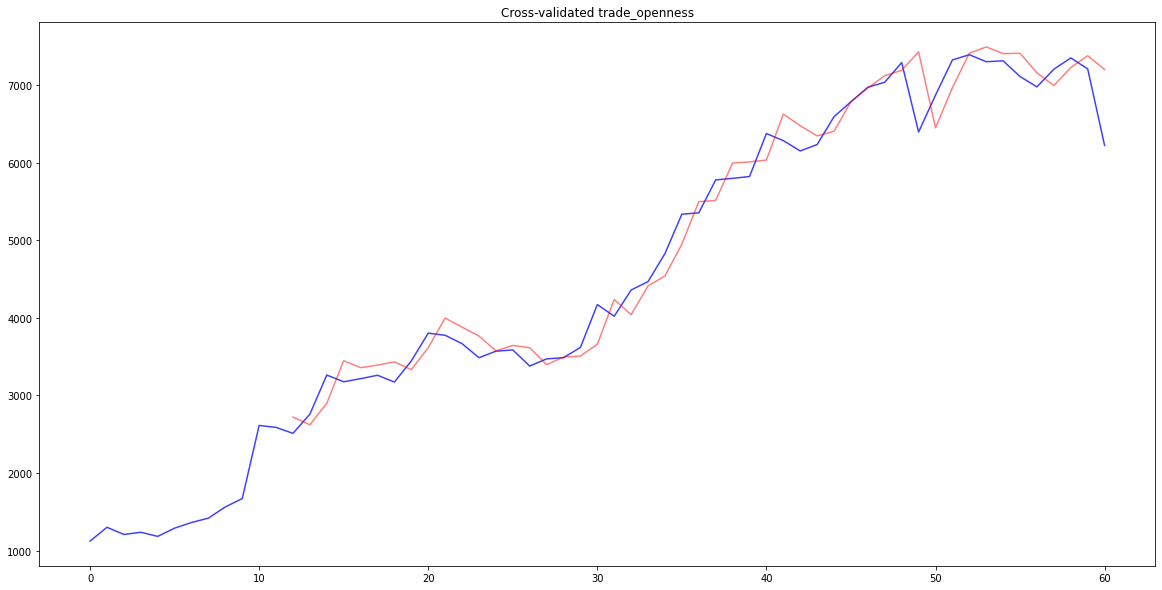

FEATURE  renewable_energy_consumption_share REGION  Cluster 2
START  1971 ALT START 1990
model-Cluster 2-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


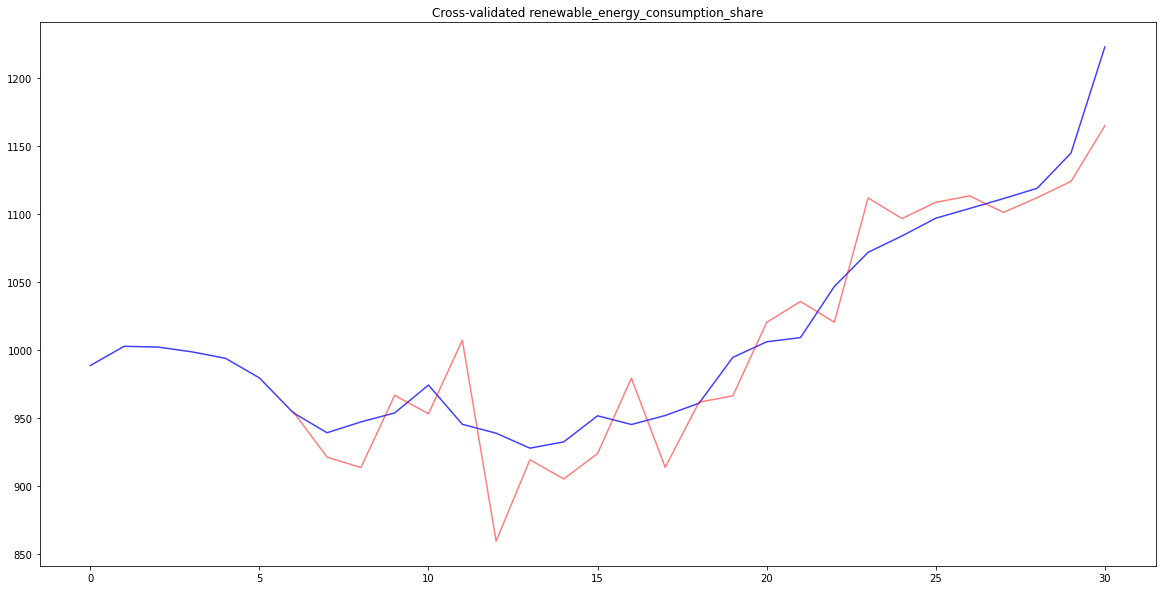

FEATURE  co2 REGION  Cluster 2
START  1750 ALT START 1750
model-Cluster 2-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


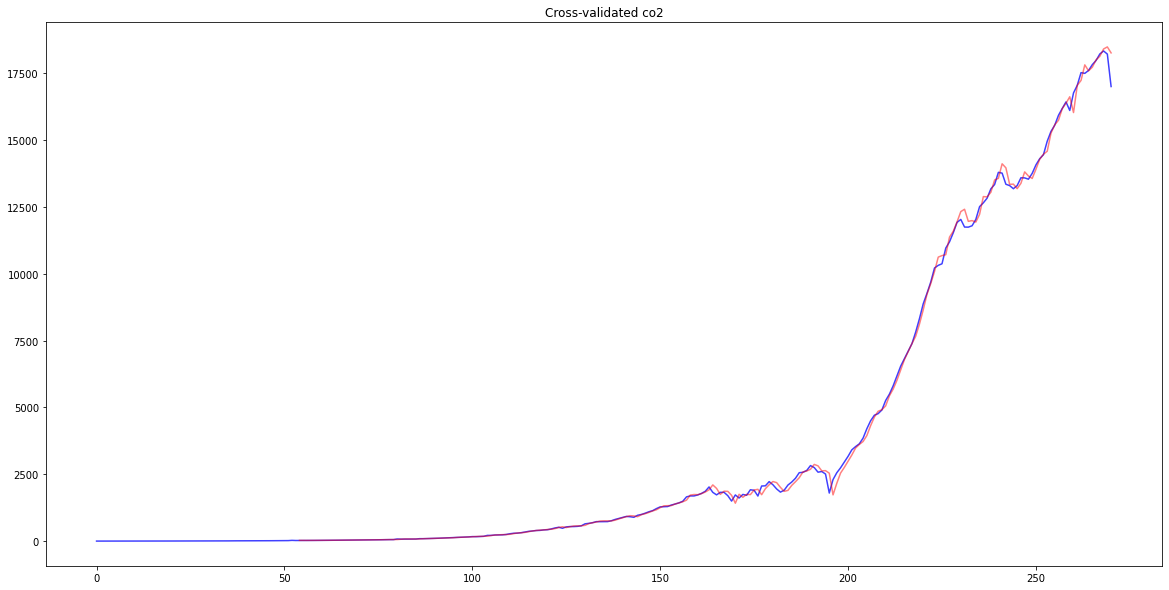

FEATURE  population REGION  Global
START  1750 ALT START 1950
model-Global-population.pkl COMPLETED
PLOTTING population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


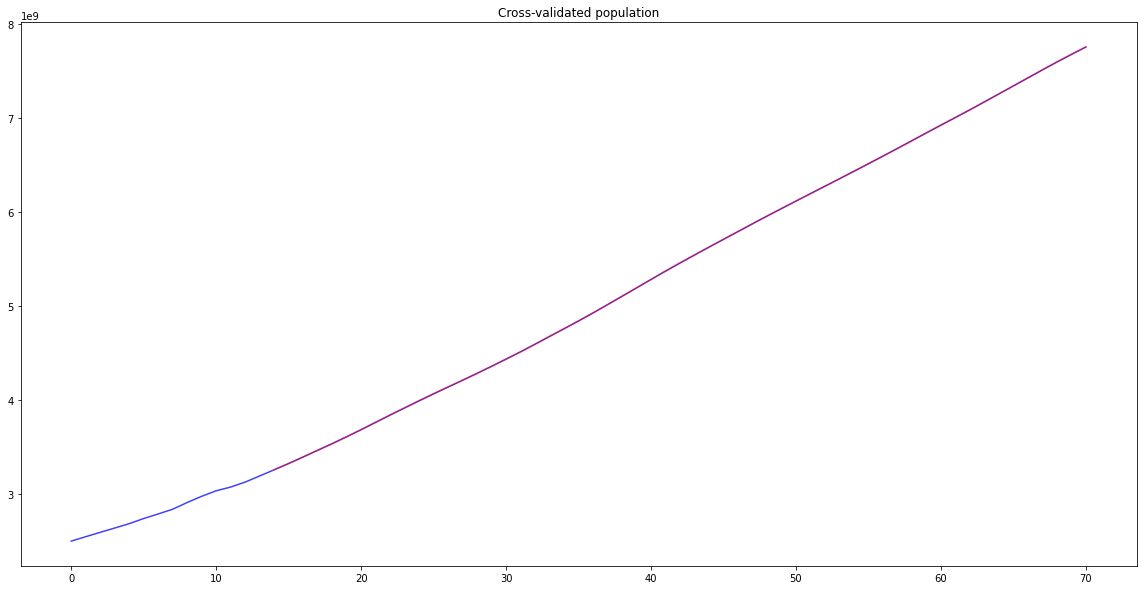

FEATURE  constant_gdp_per_capita REGION  Global
START  1960 ALT START 1970
model-Global-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


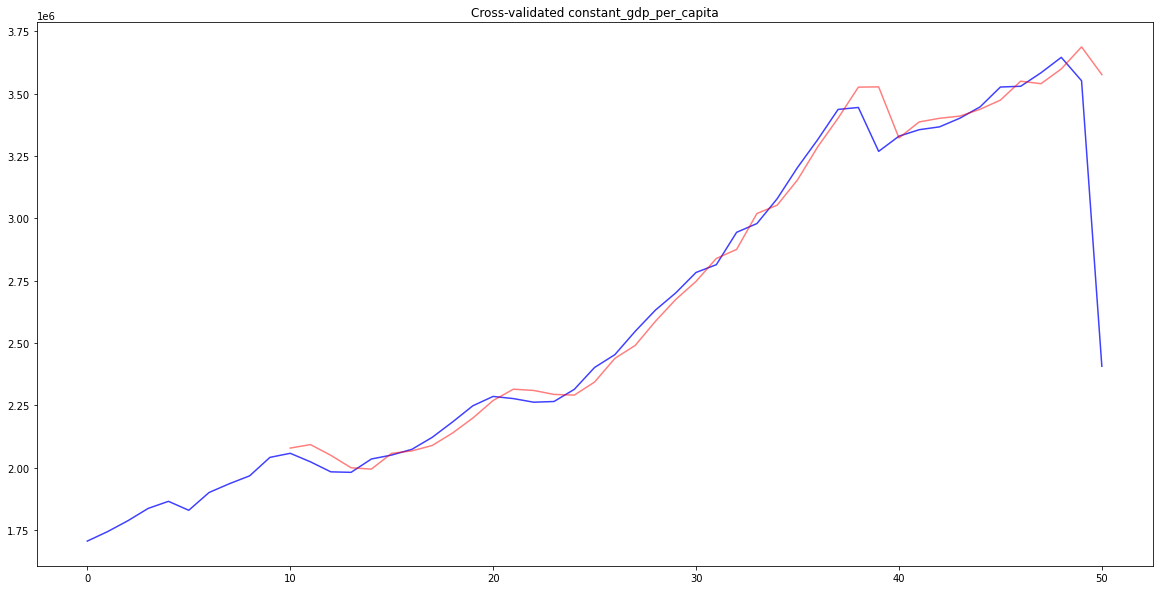

FEATURE  energy_intensity REGION  Global
START  1960 ALT START 1990
model-Global-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


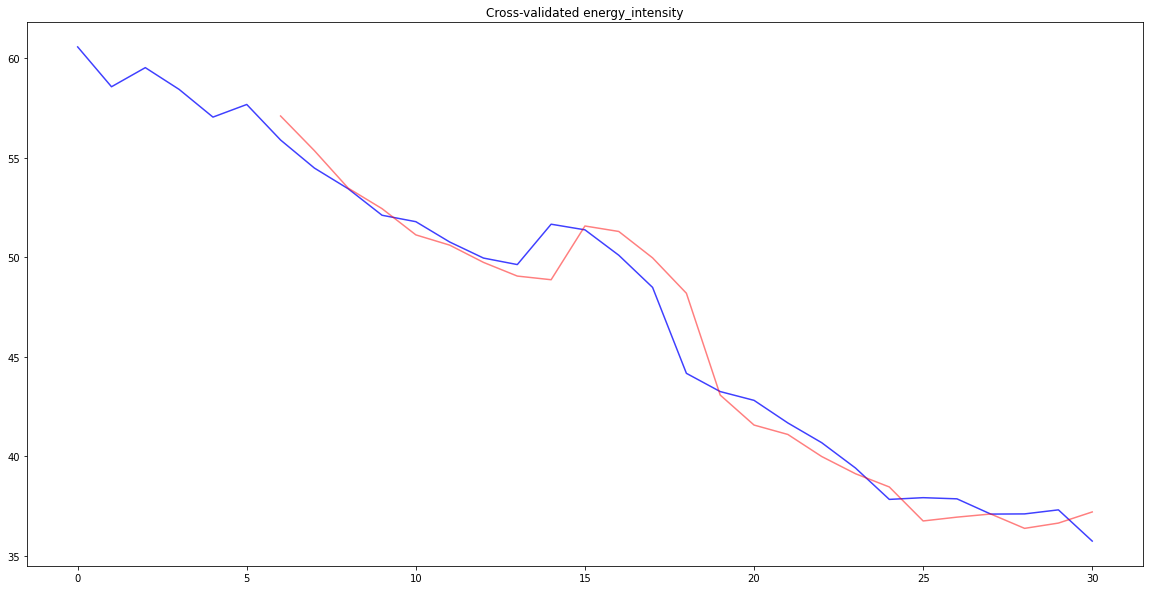

FEATURE  manufacturing_percent REGION  Global
START  1960 ALT START 1960
model-Global-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


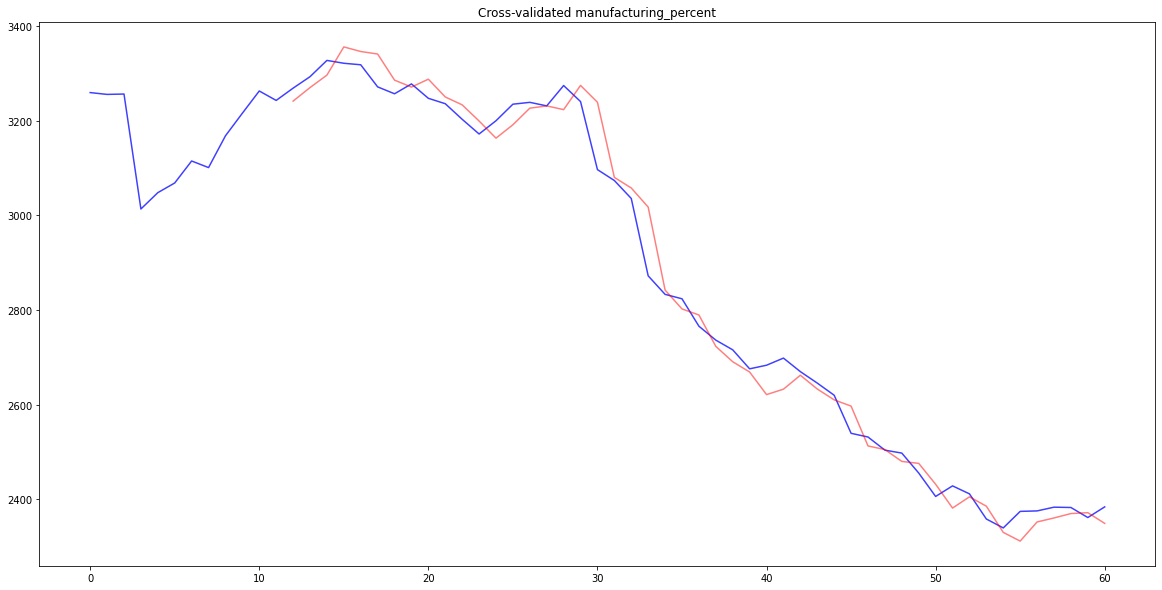

FEATURE  trade_openness REGION  Global
START  1960 ALT START 1960
model-Global-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


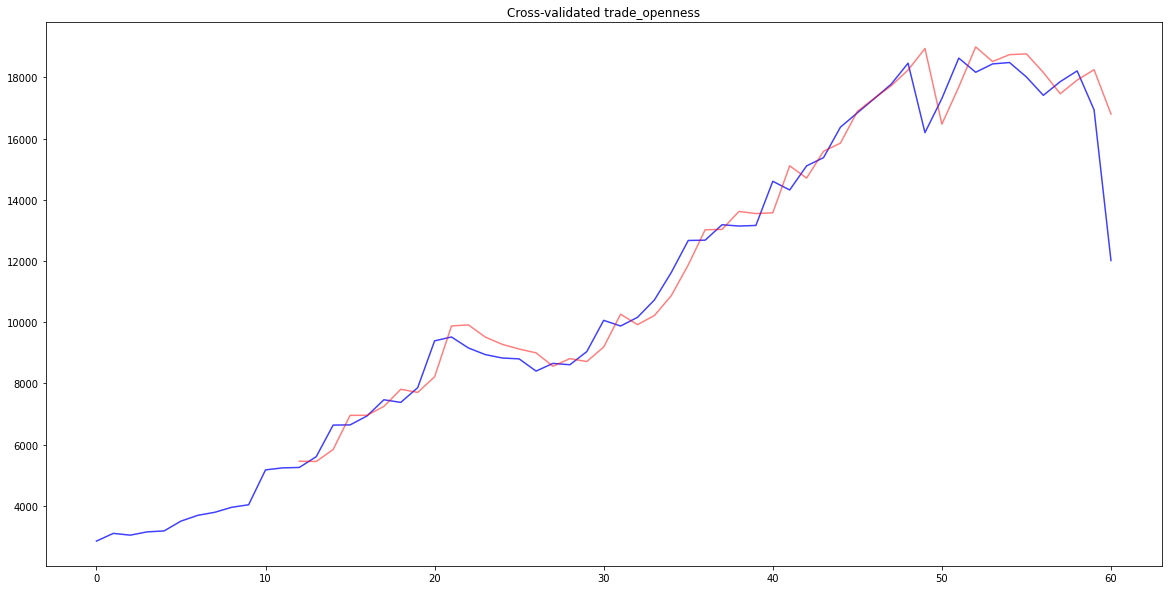

FEATURE  renewable_energy_consumption_share REGION  Global
START  1971 ALT START 1990
model-Global-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


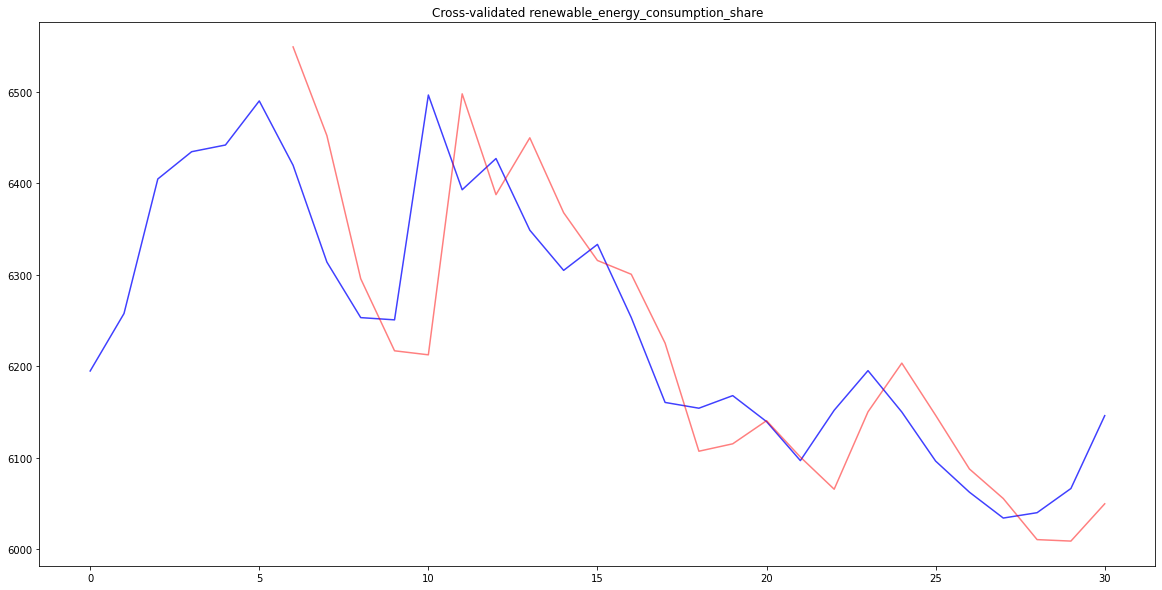

FEATURE  co2 REGION  Global
START  1750 ALT START 1750
model-Global-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


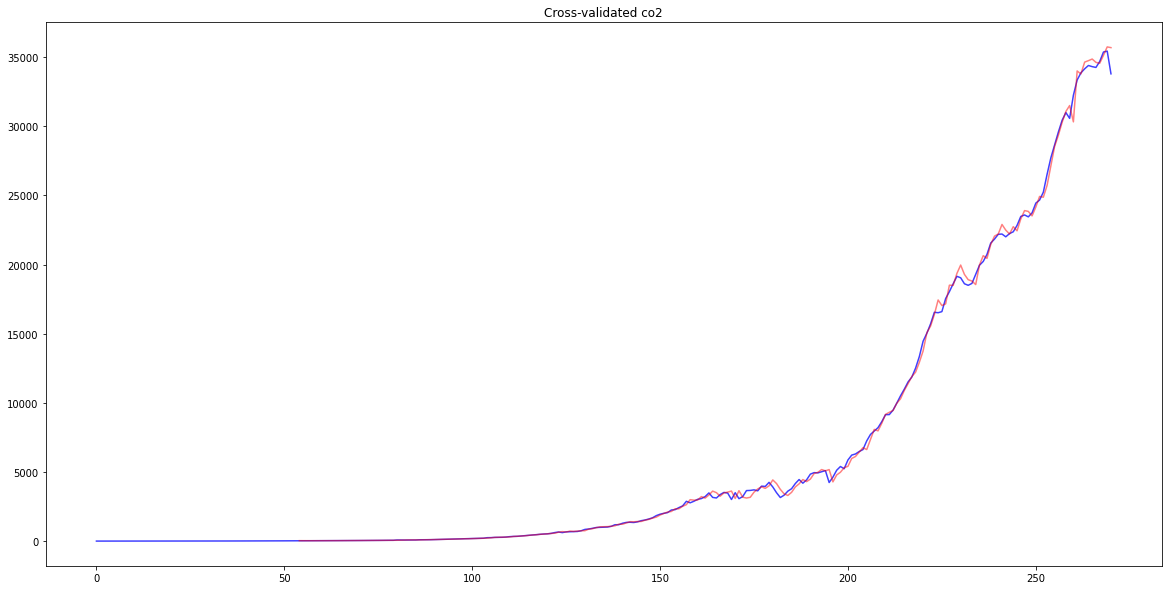

Timeseries models creation COMPLETED


In [27]:

for region in core.list_of_regions:
    result = dict()

    # Create optimised model for each feature
    # Note that the first two features are ISO_CODE and Year - these are not features for the time series
    for feature in selected[2:]:
        start = ts_period.loc[ts_period.feature == feature, 'start'].item()
        alt_start = core.check_start_override(feature, start)
        print("FEATURE ", feature, "REGION ", region)
        print("START ", start, "ALT START", alt_start)

        start = alt_start

        feature_df = core.feature_data(feature = feature,
                                       first = start,
                                       last = last_year)
        regional_df = aggregrate_region(feature_df, region)
        series = regional_df[feature].to_numpy()
        optimal = get_optimal_param(series)
        model_name = r'model-'+region+'-'+feature+r'.pkl'

        if save_models:
            full_path = model_dir/model_name
            full_path = full_path.as_posix()
            with open(full_path, 'wb') as pkl:
                pickle.dump(optimal, pkl)

        print(model_name, 'COMPLETED')
        if score:
            print('SCORE')
            print(optimal.get_params().get('order'))
            print(optimal.scoring)
            print(optimal.predict(out_of_sample_size))
        elif plot:
            if False:
                print(f'NOT ploting {feature}')
            else:
                print(f'PLOTTING {feature}')
                try:
                    plot_ts(regional_df, optimal.get_params().get('order'), feature)
                except:
                    print(f"Unable to ploat {feature}")
print("Timeseries models creation COMPLETED")